*5. Let’s use the newly created modules in unsupervised to cluster some toy data.*

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
# Import the classes from the unsupervised package
file_path = os.getcwd()
parent_path = Path(file_path)
parent_path = parent_path.parent.as_posix()
sys.path.append(str(parent_path +'/Unsupervised_model'))

from KMeans import KMeans as MyKMeans
from Kmedoids import KMedoids 

**a. Use the following code snippet to create scattered data X**

In [3]:
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

**b. Plot the resulting dataset. How many clusters are there? How far are they from one another?**

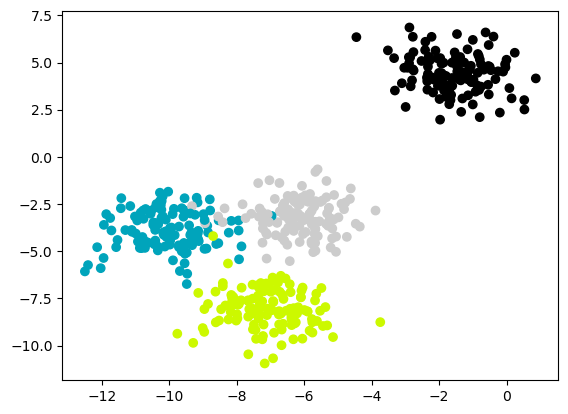

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='nipy_spectral')
plt.show()

Based on the scatter plot, there are four clusters, and they are somewhat far apart from each other, but three of them are closer and there is one more distant

**c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.**

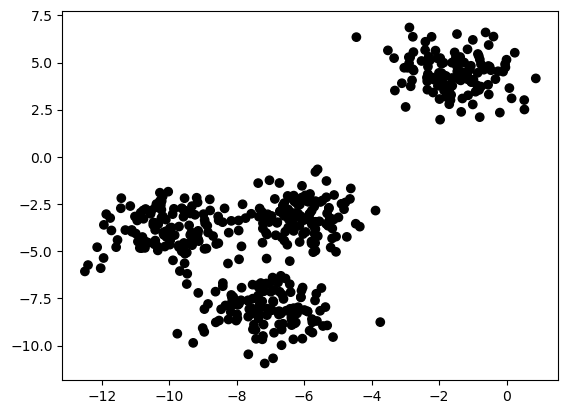

In [18]:
# Initialize KMeans
kmeans = MyKMeans(n_clusters=1)

# fit the data & predict cluster labels
kmeans.fit(X)
cluster_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster_kmeans, cmap='nipy_spectral')
plt.show()

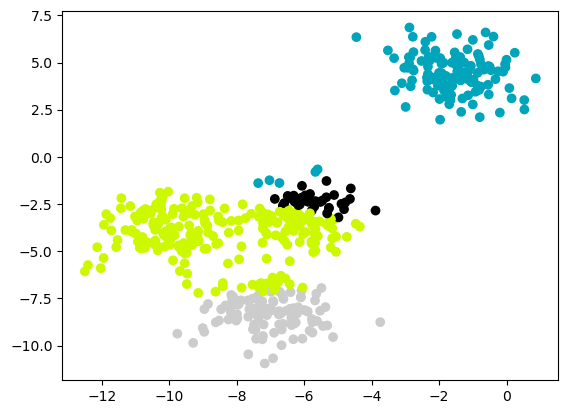

In [5]:
# Initialize KMeans
kmedoids = KMedoids(n_clusters=4)
# fit the data & predict cluster labels
kmedoids.fit(X)
cluster_kmedoids = kmedoids.predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster_kmedoids, cmap='nipy_spectral')
plt.show()

**K-MEANS**

2
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
3
For n_clusters = 3 The average silhouette_score is : 0.5640395813218549
4
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
5
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872


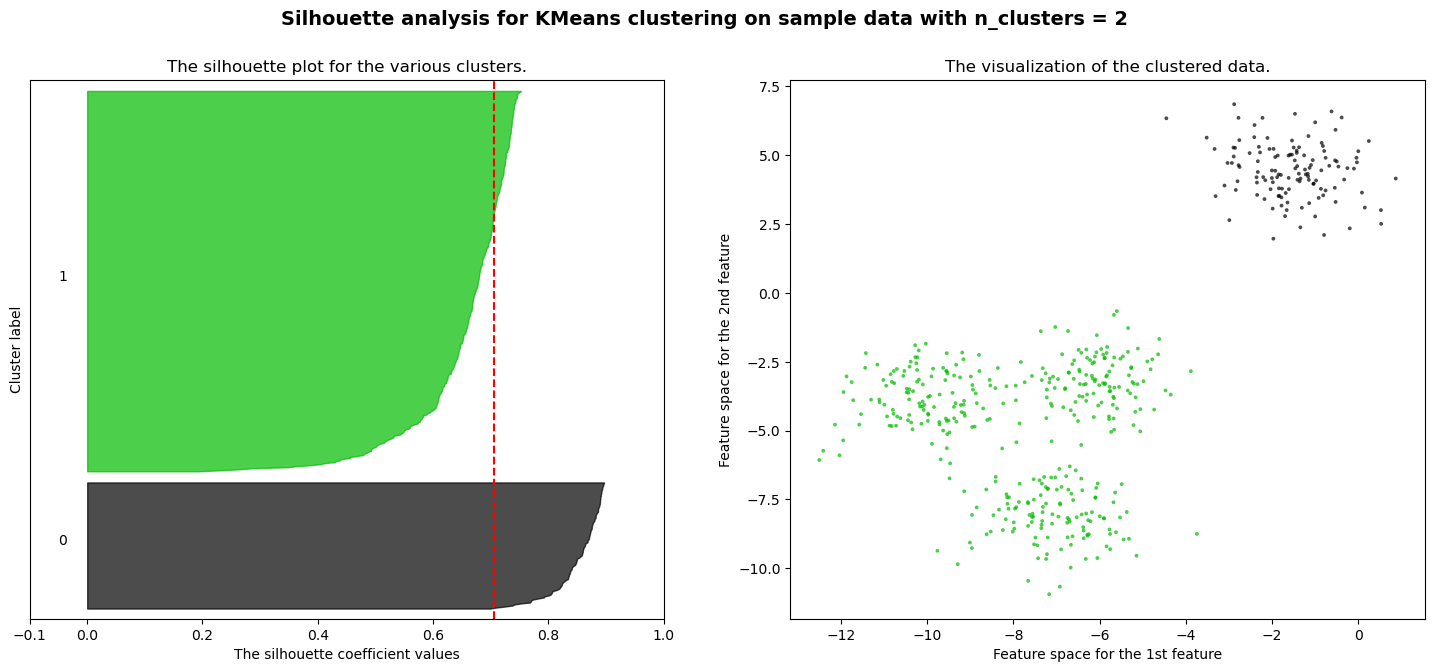

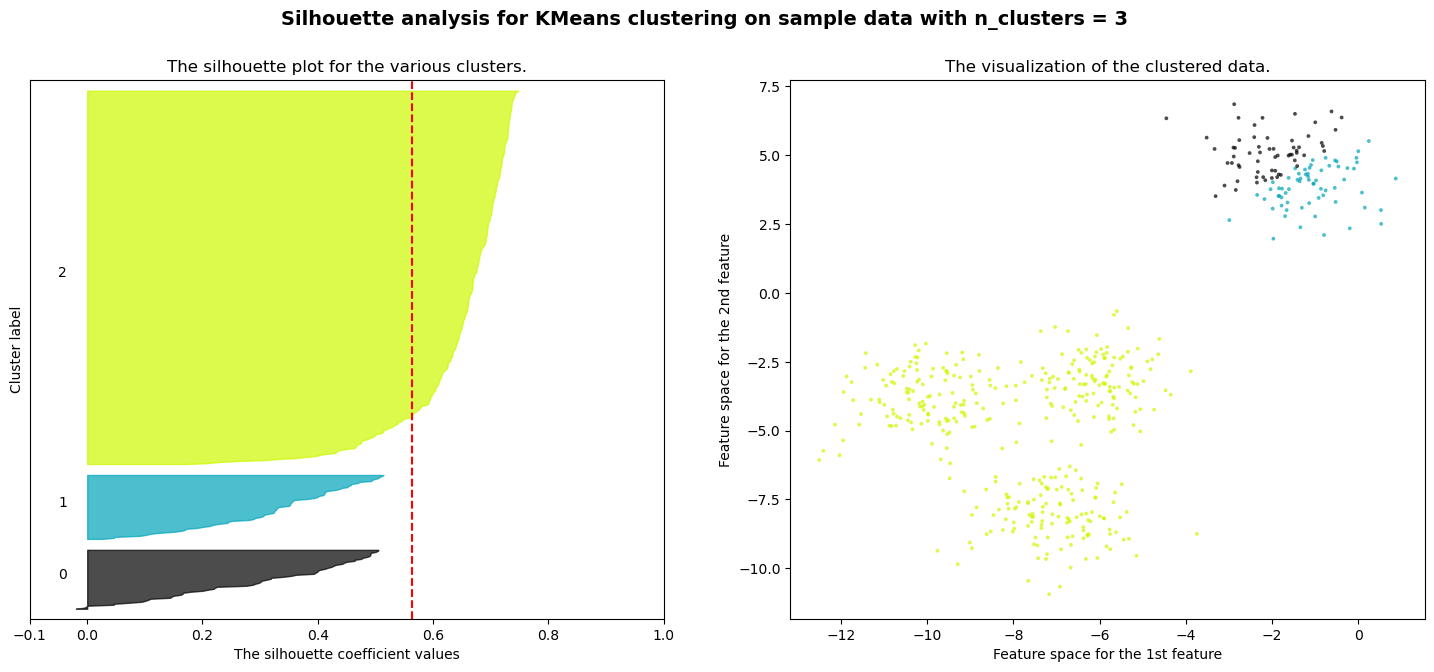

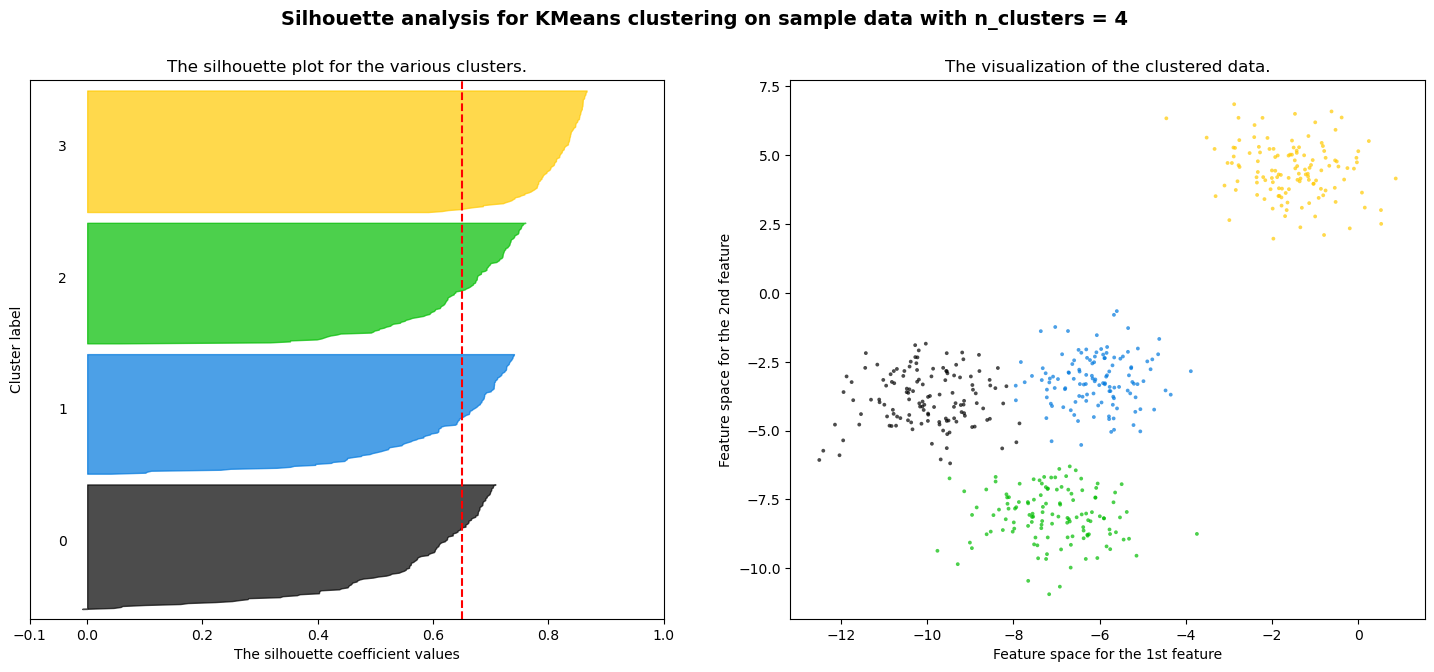

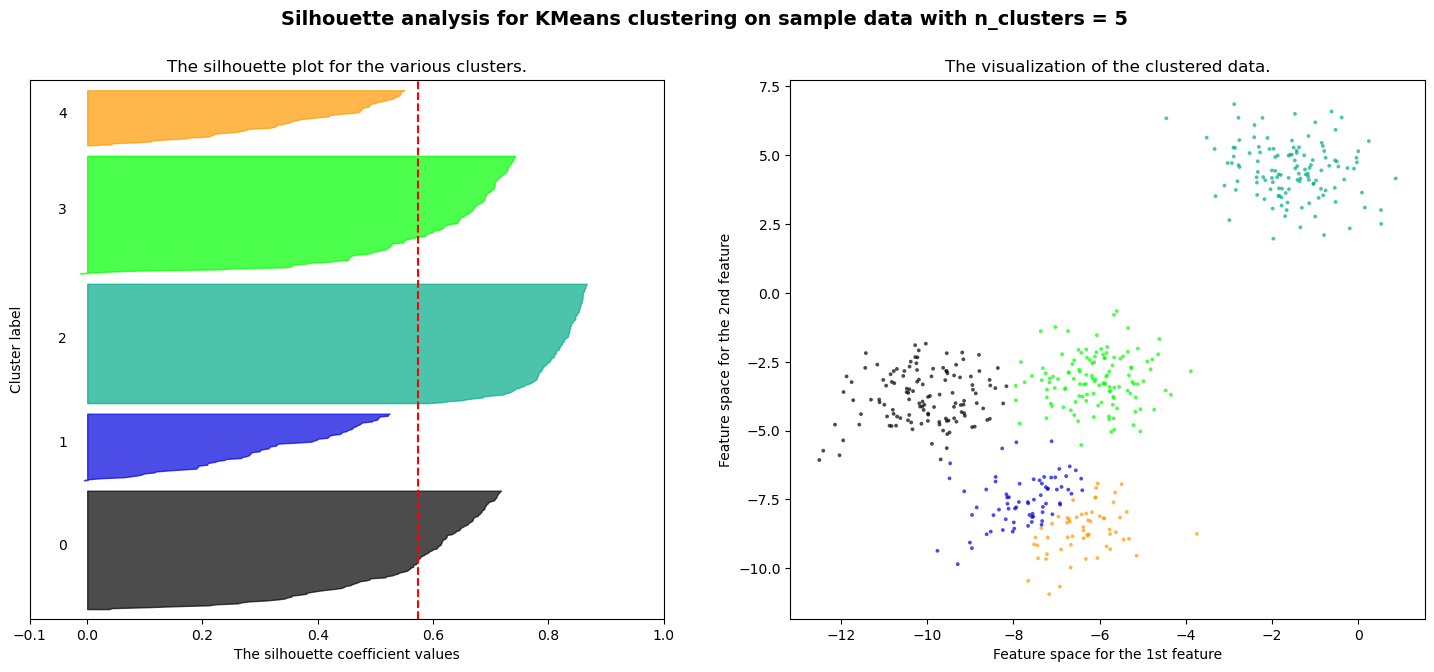

In [21]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize KMeans
    kmeans = MyKMeans(n_clusters=n_clusters)
    # fit the data & predict cluster labels
    kmeans.fit(X)
    cluster_kmeans = kmeans.predict(X)

    silhouette_avg = silhouette_score(X, cluster_kmeans)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_kmeans)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_kmeans.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**K-Medoids**

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5515915695364667
For n_clusters = 4 The average silhouette_score is : 0.7049787496083262
For n_clusters = 5 The average silhouette_score is : 0.26973630577213376


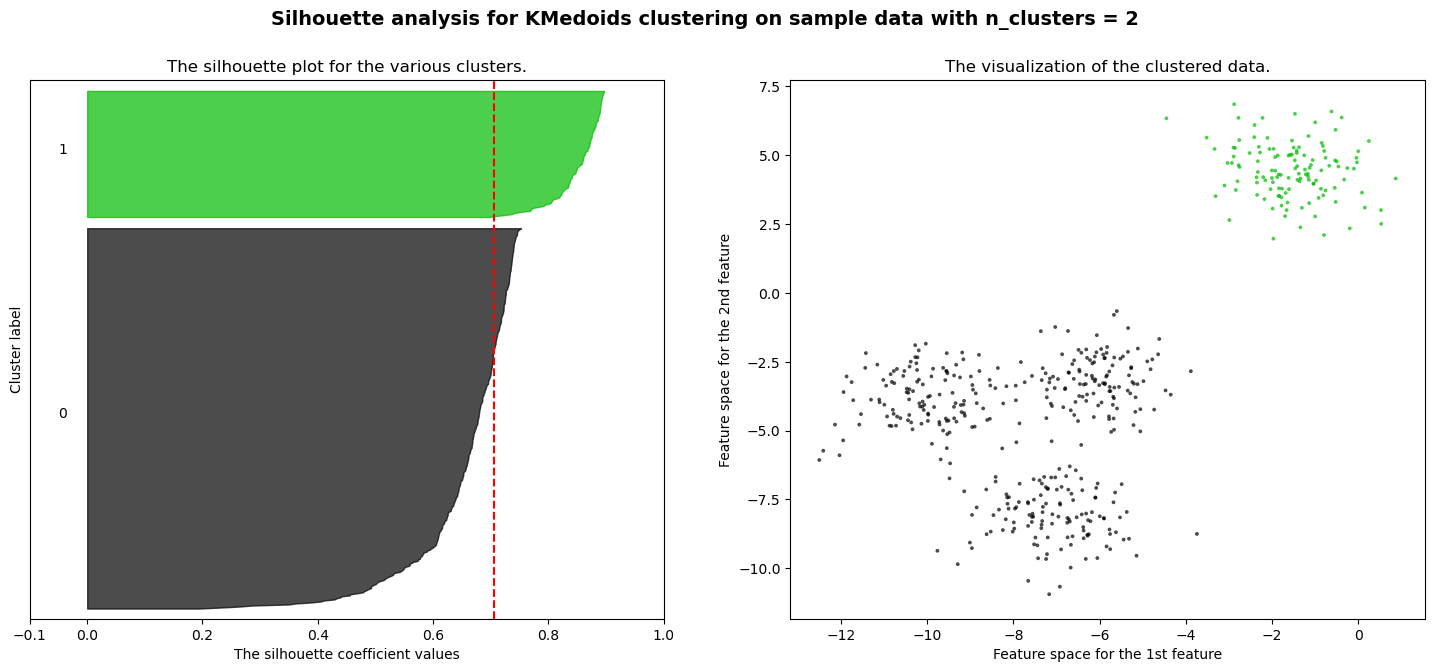

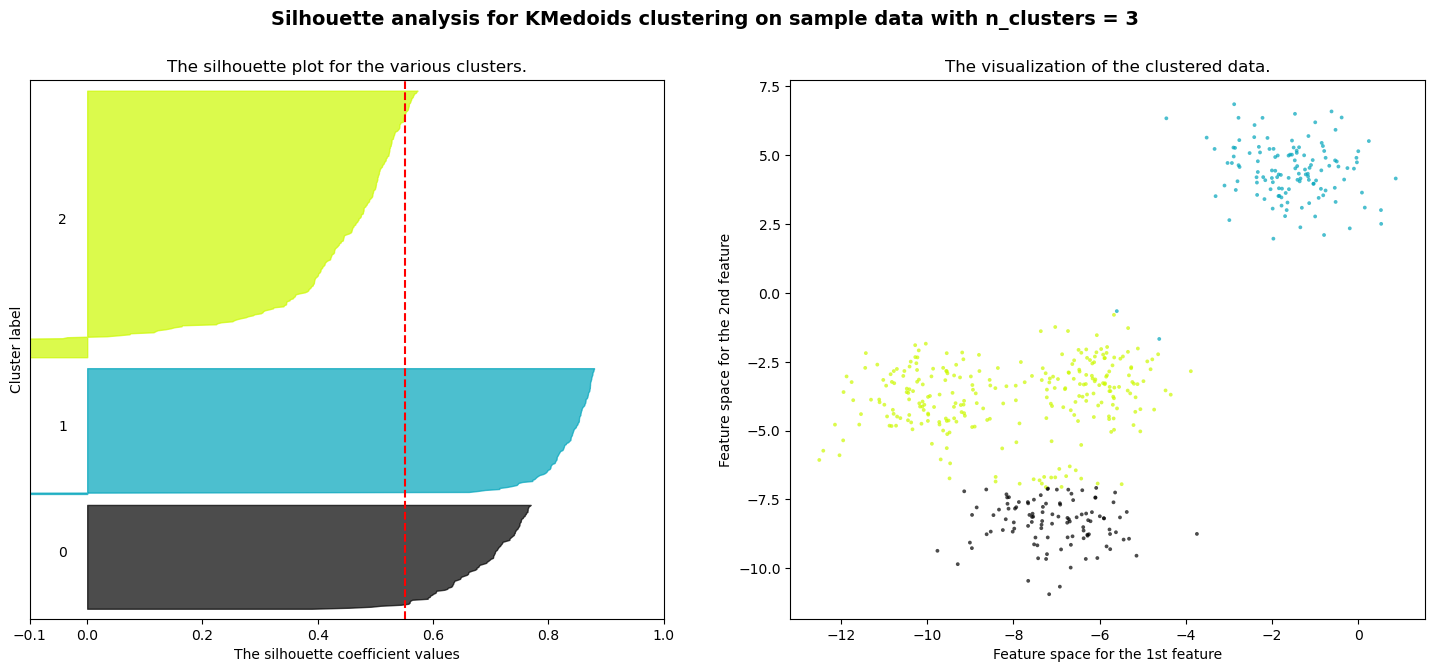

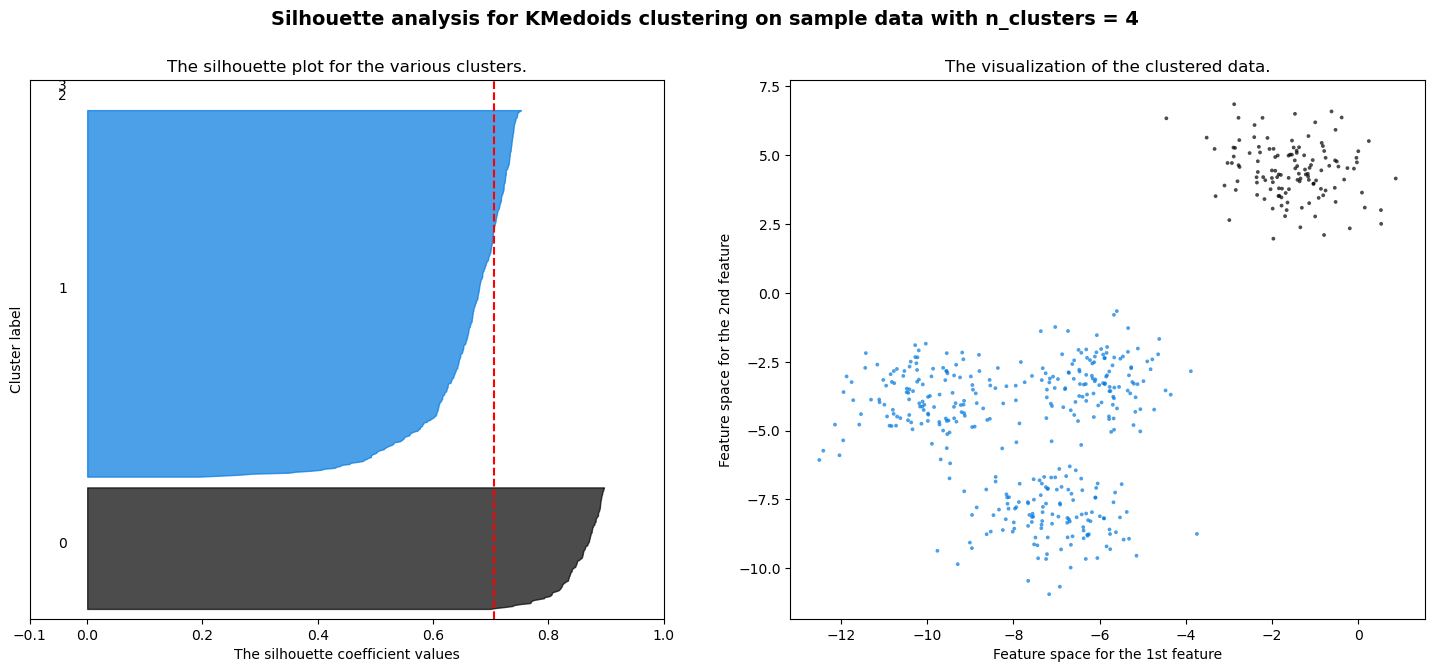

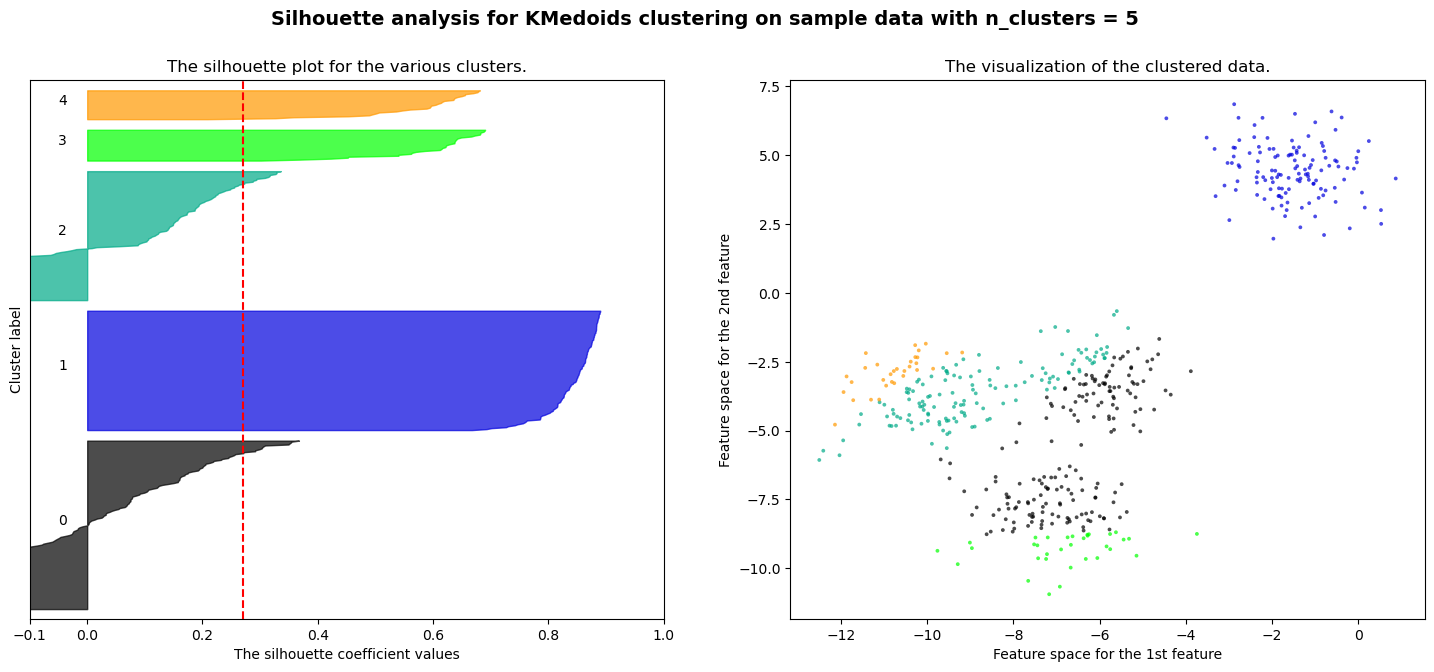

In [22]:
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmedoids = KMedoids(n_clusters=n_clusters)
    # fit the data & predict cluster labels
    kmedoids.fit(X)
    cluster_kmedoids = kmedoids.predict(X)

    silhouette_avg = silhouette_score(X, cluster_kmedoids)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_kmedoids)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_kmedoids == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_kmedoids.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMedoids clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()